# RSI - Relative Strength Index

1. RSI is a momentum oscillator which measures the speed and change of price movement.
1. RSI value oscillates between 0 and 100 with values above 70 indicating that the asset has now reached over bought territory. Values below 30 indicate oversold territory.
    1. The value: 70-30 is more applicable for developed markets, for emerging markets like India, it's more 80-20.
1. Assets can remain in overbought or oversold territories for long duration.
1. Calculation follows a two step method wherein the second step acts as a smoothening technique (similar to calculating exponential MA)
1. Steps
    1. RSI<sub>Step 1</sub>: 100 - (100 / (1 + (Avg. Gain / Avg. Loss)))
    1. RSI<sub>Step 2</sub>: 100 - (100 / (1 + ((Previous Avg Gain * 13 + Current Gain) / (Previous Avg Loss * 13 + Current Loss))))

In [1]:
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

import TECourse
from TechnicalIndicators import TechnicalIndicators

In [2]:
ticker = 'MSFT'
start = datetime.datetime.today() - datetime.timedelta(1200)
end = datetime.datetime.today()
ohlcv = pd.DataFrame() 

In [3]:
ohlcv = yf.download(ticker, start, end)

[*********************100%***********************]  1 of 1 completed


In [4]:
df = ohlcv.copy()
TechnicalIndicators.add_rsi(df)
df.tail()

,Open,High,Low,Close,Adj Close,Volume,RS,RSI
Date,,,,,,,,
2021-03-04,226.740005,232.490005,224.259995,226.729996,226.729996,44584200,0.678691,40.429771
2021-03-05,229.520004,233.270004,226.460007,231.600006,231.600006,41842100,0.904743,47.499468
2021-03-08,231.369995,233.369995,227.130005,227.389999,227.389999,35245900,0.747444,42.773567
2021-03-09,232.880005,235.380005,231.669998,233.779999,233.779999,33034000,1.031630,50.778432
2021-03-10,237.000000,237.000000,232.039993,232.419998,232.419998,29733000,0.968542,49.200987


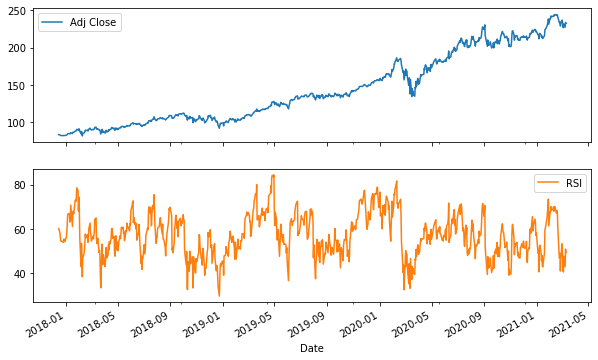

In [5]:
df[['Adj Close', 'RSI']].plot(subplots=True, figsize=(10, 6));

In [6]:
df = ohlcv.copy()
df['RSI'] = TECourse.RSI(df, 14)
df.tail()

,Open,High,Low,Close,Adj Close,Volume,RSI
Date,,,,,,,
2021-03-04,226.740005,232.490005,224.259995,226.729996,226.729996,44584200,40.429771
2021-03-05,229.520004,233.270004,226.460007,231.600006,231.600006,41842100,47.499468
2021-03-08,231.369995,233.369995,227.130005,227.389999,227.389999,35245900,42.773567
2021-03-09,232.880005,235.380005,231.669998,233.779999,233.779999,33034000,50.778432
2021-03-10,237.000000,237.000000,232.039993,232.419998,232.419998,29733000,49.200987
